## María José Fonseca Vázquez - Markov Chain Aplicada a Una Recta

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [10]:
modelo = lambda args: args[0]*x_ + args[1] 

def likelihood(args):
    lk = (y_-modelo([args[0], args[1]]))**2/(err_**2)
    return -.5*lk.sum()

In [11]:
#Puntos para ajustar:

m_ = 7
b_ = 5
lon = 20
x_ = np.linspace(0, 4, lon)
y_ = m_ * x_ + b_
err_ = []


for k in range(lon):
    y_[k] += np.random.normal(0, 0.3)
    err_.append(.2)
    
x_ = np.array([x_])
y_ = np.array([y_])
err_ = np.array([err_])    

#plt.errorbar(x_, y_, yerr = .2)
#plt.title('Puntos Para Ajustar')
#plt.xlabel('x')
#plt.ylabel('y')

In [12]:
likelihood([7, 5]) 

-19.135982769096092

In [13]:
likelihood([1, 8])

-33643.246387015475

In [14]:
def markov(m_0, b_0):
    pasos = 0
    sigma_m = .2
    sigma_b = .2
    m_old = m_0
    b_old = b_0

    while pasos <= N:  
        m_new = np.random.uniform(m_old - sigma_m, m_old + sigma_m)
        b_new = np.random.uniform(b_old - sigma_b, b_old + sigma_b)
        
        check = likelihood([m_new, b_new])/likelihood([m_old, b_old])
        
        if check < 1:
          
            m_arr.append(m_new)
            b_arr.append(b_new)
            m_old, b_old = m_new, b_new
        #elif np.random.uniform(0, 1) < (likelihood([m_new, b_new])/likelihood([m_old, b_old])):  
        elif np.random.uniform(0, 1) > check:
            #print('Si2' + str(check))
            m_arr.append(m_new)
            b_arr.append(b_new)
            #print(likelihood([m_new, b_new])/likelihood([m_old, b_old]))
            m_old, b_old = m_new, b_new
 
        pasos += 1
    
    values = [m_new, b_new]
    return values

m: 6.9579080425304065 b: 4.957657695013042
-25.45999847825243


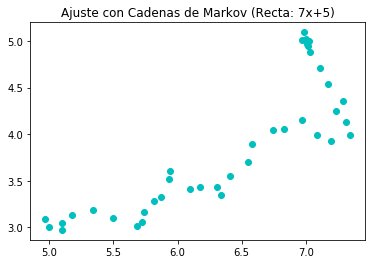

In [21]:
N = 300
m_arr = []
b_arr = []

m_in = 5
b_in = 3

m_arr.append(m_in)
b_arr.append(b_in)


res = markov(m_in, b_in)
m_arr, b_arr
plt.plot(m_arr, b_arr, 'co')
plt.title('Ajuste con Cadenas de Markov (Recta: 7x+5)')
print('m: ' + str(res[0]) + ' b: ' + str(res[1]))
print(likelihood(res))